<a href="https://colab.research.google.com/github/tisonpatrik/deep_learning_training/blob/main/sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [524]:
import numpy as np
import pandas as pd
import plotly.express as px
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

download files from https://www.kaggle.com/competitions/titanic/data

and upload them into your google drive

In [525]:
train_data = pd.read_csv('/content/drive/MyDrive/python/ML/Titanic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/python/ML/Titanic/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/python/ML/Titanic/gender_submission.csv')

In [526]:
raw_data = pd.concat([train_data, test_data])
raw_data.set_index('PassengerId', inplace=True)
gender_submission.set_index('PassengerId', inplace=True)
raw_data.update(gender_submission)
raw_data.reset_index(inplace=True)
raw_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0.0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0.0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [527]:
print(raw_data.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [528]:
def plotly_violin_plot(dataframe):
    # Melt the data for visualization
    df_std_melted = dataframe.melt(var_name='Column', value_name='Normalized')

    # Create the violin plot using plotly express with different colors for each column
    fig = px.violin(df_std_melted, x='Column', y='Normalized', color='Column',
                    box=True, points="all", hover_data=df_std_melted.columns)
    fig.show()

In [529]:
df = raw_data

In [530]:
# drop nan for Fare
df = df.dropna(subset=['Fare'])

In [531]:
# faetures setup
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

<ipython-input-531-bd64915d9257>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-531-bd64915d9257>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [532]:
# drop useless columns
df = df.drop(columns=['Cabin'])
df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Embarked'])
df = df.drop(columns=['Name'])

In [533]:
fig = px.histogram(df, x='Age', title='Distribution of Age', nbins=10)  # You can adjust the nbins parameter for the number of bins you prefer
fig.show()

In [534]:
fig = px.bar(df['Pclass'].value_counts().reset_index(), x='index', y='Pclass', title='Distribution of Ticket Class', color='index', labels={'index': 'Ticket Class', 'Pclass': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [535]:
fig = px.histogram(df, x="Fare", title='Distribution of Fare', nbins=500)
fig.show()

In [536]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1304,1305,0.0,3,0,NaN,0,0,8.0500
1305,1306,1.0,1,1,39.0,0,0,108.9000
1306,1307,0.0,3,0,38.5,0,0,7.2500
1307,1308,0.0,3,0,NaN,0,0,8.0500
1308,1309,0.0,3,0,NaN,1,1,22.3583


In [537]:
len(df)

1308

In [538]:
df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass', drop_first=False)
df.tail()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
1304,1305,0.0,0,NaN,0,0,8.0500,0,0,1
1305,1306,1.0,1,39.0,0,0,108.9000,1,0,0
1306,1307,0.0,0,38.5,0,0,7.2500,0,0,1
1307,1308,0.0,0,NaN,0,0,8.0500,0,0,1
1308,1309,0.0,0,NaN,1,1,22.3583,0,0,1


In [539]:
fig = px.histogram(df, x="SibSp", title='Distribution of Siblings', nbins=10)
fig.show()

In [540]:
fig = px.histogram(df, x="Parch", title='Distribution of Parents', nbins=10)
fig.show()

In [541]:
df.set_index('PassengerId', inplace=True)

In [542]:
plotly_violin_plot(df)

In [543]:
fig = px.histogram(df, x="Age", title='Distribution of Age', nbins=10)
fig.show()

In [544]:
fig = px.histogram(df, x="Fare", title='Distribution of Fare', nbins=10)
fig.show()

In [545]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Suppose you only have numeric columns in df
df_imputed = imputer.fit_transform(df)

# Replace original data with imputed data
df = pd.DataFrame(df_imputed, columns=df.columns)

In [546]:
print(df.isnull().sum())

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64


In [547]:
fig = px.histogram(df, x="Age", title='Distribution of Age', nbins=10)
fig.show()

In [548]:
age_bins = 5
fare_bins = 5

# Transform Age into intervals
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=False)

# Transform Fare into intervals
df['Fare'] = pd.cut(df['Fare'], bins=fare_bins, labels=False)

In [549]:
df.tail()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
1303,0.0,0.0,1,0.0,0.0,0,0.0,0.0,1.0
1304,1.0,1.0,2,0.0,0.0,1,1.0,0.0,0.0
1305,0.0,0.0,2,0.0,0.0,0,0.0,0.0,1.0
1306,0.0,0.0,1,0.0,0.0,0,0.0,0.0,1.0
1307,0.0,0.0,1,1.0,1.0,0,0.0,0.0,1.0


<Axes: >

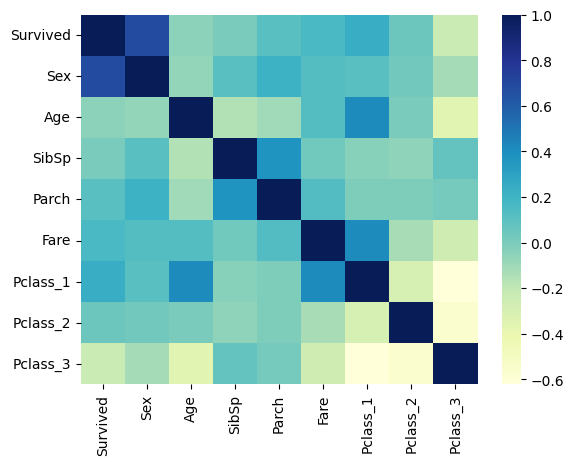

In [550]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='YlGnBu')

In [551]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [552]:
plotly_violin_plot(X)

In [553]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [554]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)

Shape of X_train: (1046, 8)
Shape of y_train: (1046,)


In [555]:
def plot_training_progress(training_progress, validation_progress):
    # Create a DataFrame to organize data for plotting
    df = pd.DataFrame({
        'Epoch': list(range(1, len(training_progress) + 1)),
        'Training Loss': training_progress,
        'Validation Loss': validation_progress
    })

    # Plot using plotly
    fig = px.line(df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                  title='Training and Validation Progress', labels={'y': 'Loss'})
    fig.show()

In [556]:
# Define the model
logistic_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

In [557]:
MAX_EPOCHS = 100

def compile_and_fit(model, X_train, y_train, X_val, y_val, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

    history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])
    return history

In [558]:
history = compile_and_fit(logistic_regression, X_train, y_train, X_val, y_val)

Epoch 1/100
33/33 [==============================] - 1s 12ms/step - loss: 0.6235 - binary_accuracy: 0.7132 - val_loss: 0.6468 - val_binary_accuracy: 0.6641
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.6086 - binary_accuracy: 0.7380 - val_loss: 0.6404 - val_binary_accuracy: 0.6718
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.5962 - binary_accuracy: 0.7390 - val_loss: 0.6336 - val_binary_accuracy: 0.6718
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.5853 - binary_accuracy: 0.7553 - val_loss: 0.6266 - val_binary_accuracy: 0.7252
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5758 - binary_accuracy: 0.7792 - val_loss: 0.6196 - val_binary_accuracy: 0.7176
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5668 - binary_accuracy: 0.7782 - val_loss: 0.6129 - val_binary_accuracy: 0.7252
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - lo

In [559]:
val_performance = {}
performance = {}
val_performance = logistic_regression.evaluate(X_val, y_val)
performance = logistic_regression.evaluate(X_test, y_test, verbose=0)

5/5 [==============================] - 0s 3ms/step - loss: 0.4337 - binary_accuracy: 0.8168


In [560]:
def plot_metrics(history, val_performance, performance):
    # Plotting the trends during training
    metrics_df = pd.DataFrame(history.history)
    metrics_df['epoch'] = range(1, len(metrics_df) + 1)

    fig1 = px.line(metrics_df, x='epoch', y=['loss', 'val_loss'],
                   title='Training and Validation Loss over Epochs',
                   labels={'value': 'Loss', 'variable': 'Dataset'})
    fig1.show()

    fig2 = px.line(metrics_df, x='epoch', y=['binary_accuracy', 'val_binary_accuracy'],
                   title='Training and Validation Accuracy over Epochs',
                   labels={'value': 'Accuracy', 'variable': 'Dataset'})
    fig2.show()

    # Plotting the final performance on validation and test sets
    df = pd.DataFrame({
        'Metric': ['Loss', 'Loss', 'Accuracy', 'Accuracy'],
        'Type': ['Validation', 'Test', 'Validation', 'Test'],
        'Value': [val_performance[0], performance[0], val_performance[1], performance[1]]
    })

    fig = px.bar(df, x='Metric', y='Value', color='Type', barmode="group",
                 title='Performance on Validation and Test Sets',
                 category_orders={"Metric": ["Loss", "Accuracy"], "Type": ["Validation", "Test"]},
                 color_discrete_map={"Validation": "blue", "Test": "orange"})
    fig.show()

In [561]:
plot_metrics(history, val_performance, performance)